In [1]:
#CKVGG19-1EXP

2024-10-20 11:19:21.530431: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 11:19:21.873502: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-20 11:19:22.677001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 787 images belonging to 7 classes.
Found 194 images belonging to 7 classes.
Train and Validation sets have been created.
Above data generator functions have been created.
Above data generator functions have been created.


2024-10-20 11:19:24.400353: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-20 11:19:24.578329: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-20 11:19:24.578486: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

CNN model has been created you can proceed to train you data with this model.


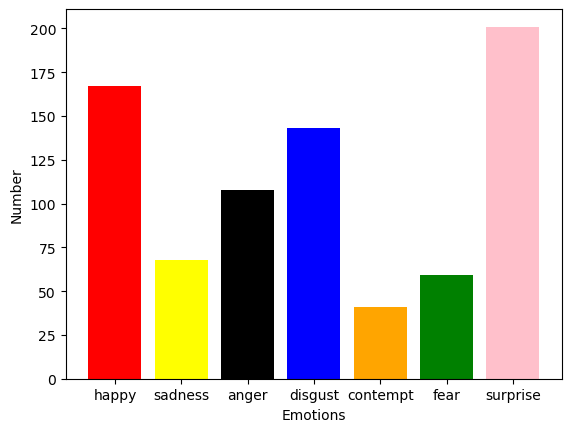

In [2]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
#plt.show()


batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("CK+48/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("CK+48/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')





# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')





#model vgg19

from keras.applications.vgg19 import VGG19
conv_base = VGG19(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

#model.summary()






# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [3]:

epochs = 500

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     
    
    
    
    
    

Epoch 1/500


/tmp/ipykernel_4392/3806955214.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,
2024-10-20 11:19:27.613107: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-10-20 11:19:28.192194: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-20 11:19:28.208745: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x32b10070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-20 11:19:28.208762: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-10-20 11:19:28.224646: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR cras

12/12 [==============================] - 4s 51ms/step - loss: 1.7217 - accuracy: 0.4412 - val_loss: 2.5736 - val_accuracy: 0.5365
Epoch 2/500
12/12 [==============================] - 0s 22ms/step - loss: 0.9977 - accuracy: 0.6570 - val_loss: 1.2572 - val_accuracy: 0.6719
Epoch 3/500
12/12 [==============================] - 0s 23ms/step - loss: 0.6316 - accuracy: 0.7801 - val_loss: 1.1103 - val_accuracy: 0.6354
Epoch 4/500
12/12 [==============================] - 0s 22ms/step - loss: 0.5651 - accuracy: 0.7967 - val_loss: 0.6339 - val_accuracy: 0.7656
Epoch 5/500
12/12 [==============================] - 0s 23ms/step - loss: 0.4245 - accuracy: 0.8492 - val_loss: 0.5942 - val_accuracy: 0.7917
Epoch 6/500
12/12 [==============================] - 0s 23ms/step - loss: 0.3144 - accuracy: 0.8935 - val_loss: 0.4760 - val_accuracy: 0.8073
Epoch 7/500
12/12 [==============================] - 0s 23ms/step - loss: 0.2968 - accuracy: 0.8971 - val_loss: 0.3673 - val_accuracy: 0.8750
Epoch 8/500
12/12 

12/12 [==============================] - 0s 23ms/step - loss: 0.0365 - accuracy: 0.9862 - val_loss: 0.0908 - val_accuracy: 0.9792
Epoch 59/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0400 - accuracy: 0.9862 - val_loss: 0.1016 - val_accuracy: 0.9740
Epoch 60/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0333 - accuracy: 0.9876 - val_loss: 0.0966 - val_accuracy: 0.9792
Epoch 61/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0313 - accuracy: 0.9889 - val_loss: 0.0919 - val_accuracy: 0.9792
Epoch 62/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0359 - accuracy: 0.9876 - val_loss: 0.1647 - val_accuracy: 0.9583
Epoch 63/500
12/12 [==============================] - 0s 25ms/step - loss: 0.0355 - accuracy: 0.9876 - val_loss: 0.1741 - val_accuracy: 0.9635
Epoch 64/500
12/12 [==============================] - 0s 27ms/step - loss: 0.0410 - accuracy: 0.9889 - val_loss: 0.2662 - val_accuracy: 0.9271
Epoch 65/500

12/12 [==============================] - 0s 22ms/step - loss: 0.0461 - accuracy: 0.9903 - val_loss: 0.2250 - val_accuracy: 0.9688
Epoch 116/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0289 - accuracy: 0.9945 - val_loss: 0.2286 - val_accuracy: 0.9635
Epoch 117/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0184 - accuracy: 0.9945 - val_loss: 0.1899 - val_accuracy: 0.9635
Epoch 118/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0131 - accuracy: 0.9945 - val_loss: 0.1531 - val_accuracy: 0.9792
Epoch 119/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.1651 - val_accuracy: 0.9792
Epoch 120/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.1515 - val_accuracy: 0.9792
Epoch 121/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.1608 - val_accuracy: 0.9740
Epoch 

Epoch 172/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0189 - accuracy: 0.9931 - val_loss: 0.1688 - val_accuracy: 0.9792
Epoch 173/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0118 - accuracy: 0.9986 - val_loss: 0.1650 - val_accuracy: 0.9792
Epoch 174/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0140 - accuracy: 0.9959 - val_loss: 0.1915 - val_accuracy: 0.9740
Epoch 175/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0108 - accuracy: 0.9959 - val_loss: 0.2335 - val_accuracy: 0.9740
Epoch 176/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0281 - accuracy: 0.9935 - val_loss: 0.2013 - val_accuracy: 0.9792
Epoch 177/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.2648 - val_accuracy: 0.9740
Epoch 178/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0381 - accuracy: 0.9862 - val_loss: 0.2402 - val_accuracy:

Epoch 229/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0107 - accuracy: 0.9959 - val_loss: 0.1460 - val_accuracy: 0.9740
Epoch 230/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0167 - accuracy: 0.9931 - val_loss: 0.1068 - val_accuracy: 0.9740
Epoch 231/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0395 - accuracy: 0.9862 - val_loss: 0.0942 - val_accuracy: 0.9896
Epoch 232/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0201 - accuracy: 0.9945 - val_loss: 0.1281 - val_accuracy: 0.9740
Epoch 233/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0160 - accuracy: 0.9922 - val_loss: 0.1149 - val_accuracy: 0.9792
Epoch 234/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0109 - accuracy: 0.9986 - val_loss: 0.1149 - val_accuracy: 0.9792
Epoch 235/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0196 - accuracy: 0.9931 - val_loss: 0.2148 - val_accuracy:

Epoch 286/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0113 - accuracy: 0.9972 - val_loss: 0.1715 - val_accuracy: 0.9792
Epoch 287/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 0.1721 - val_accuracy: 0.9792
Epoch 288/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0166 - accuracy: 0.9931 - val_loss: 0.1701 - val_accuracy: 0.9792
Epoch 289/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.1621 - val_accuracy: 0.9792
Epoch 290/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0063 - accuracy: 0.9972 - val_loss: 0.1453 - val_accuracy: 0.9792
Epoch 291/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0127 - accuracy: 0.9931 - val_loss: 0.1762 - val_accuracy: 0.9792
Epoch 292/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0100 - accuracy: 0.9972 - val_loss: 0.1799 - val_accuracy:

Epoch 343/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0242 - accuracy: 0.9917 - val_loss: 0.1595 - val_accuracy: 0.9635
Epoch 344/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.1670 - val_accuracy: 0.9688
Epoch 345/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.1572 - val_accuracy: 0.9688
Epoch 346/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.1599 - val_accuracy: 0.9792
Epoch 347/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.1432 - val_accuracy: 0.9792
Epoch 348/500
12/12 [==============================] - 0s 22ms/step - loss: 0.0060 - accuracy: 0.9986 - val_loss: 0.1320 - val_accuracy: 0.9792
Epoch 349/500
12/12 [==============================] - 0s 24ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.1193 - val_accuracy:

Epoch 400/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.2037 - val_accuracy: 0.9688
Epoch 401/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0113 - accuracy: 0.9972 - val_loss: 0.1454 - val_accuracy: 0.9792
Epoch 402/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.1362 - val_accuracy: 0.9740
Epoch 403/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0095 - accuracy: 0.9959 - val_loss: 0.1360 - val_accuracy: 0.9844
Epoch 404/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0120 - accuracy: 0.9959 - val_loss: 0.1719 - val_accuracy: 0.9792
Epoch 405/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.1847 - val_accuracy: 0.9792
Epoch 406/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.1738 - val_accuracy:

Epoch 457/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0141 - accuracy: 0.9959 - val_loss: 0.0786 - val_accuracy: 0.9844
Epoch 458/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0108 - accuracy: 0.9972 - val_loss: 0.0903 - val_accuracy: 0.9844
Epoch 459/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0069 - accuracy: 0.9986 - val_loss: 0.1244 - val_accuracy: 0.9844
Epoch 460/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0036 - accuracy: 0.9986 - val_loss: 0.1448 - val_accuracy: 0.9792
Epoch 461/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0069 - accuracy: 0.9972 - val_loss: 0.1490 - val_accuracy: 0.9740
Epoch 462/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0239 - accuracy: 0.9931 - val_loss: 0.1621 - val_accuracy: 0.9792
Epoch 463/500
12/12 [==============================] - 0s 23ms/step - loss: 0.0255 - accuracy: 0.9931 - val_loss: 0.1966 - val_accuracy:

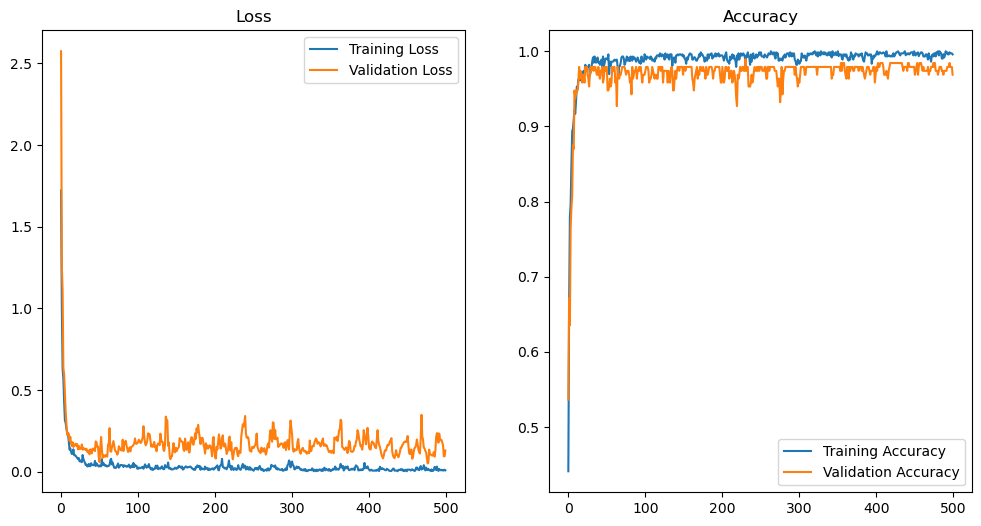

In [4]:

    # Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [5]:
#ckresnet--1exp

Found 787 images belonging to 7 classes.
Found 194 images belonging to 7 classes.
Train and Validation sets have been created.
Above data generator functions have been created.
Above data generator functions have been created.
CNN model has been created you can proceed to train you data with this model.


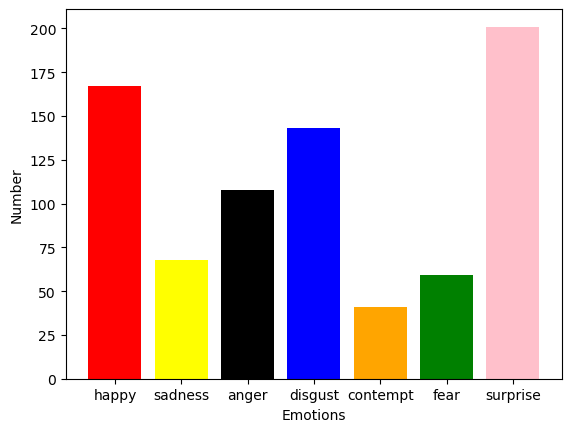

In [6]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
#plt.show()


batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("CK+48/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("CK+48/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')





# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')





#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

#model.summary()






# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [7]:

epochs = 500

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     
    
    
    
    
    


Epoch 1/500


/tmp/ipykernel_4392/1281752000.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,


12/12 [==============================] - 7s 181ms/step - loss: 1.6034 - accuracy: 0.4792 - val_loss: 3.2614 - val_accuracy: 0.5260
Epoch 2/500
12/12 [==============================] - 1s 60ms/step - loss: 0.7864 - accuracy: 0.7137 - val_loss: 2.8889 - val_accuracy: 0.4844
Epoch 3/500
12/12 [==============================] - 0s 30ms/step - loss: 0.6281 - accuracy: 0.7676 - val_loss: 1.7920 - val_accuracy: 0.5729
Epoch 4/500
12/12 [==============================] - 0s 30ms/step - loss: 0.3921 - accuracy: 0.8700 - val_loss: 1.4932 - val_accuracy: 0.6458
Epoch 5/500
12/12 [==============================] - 0s 29ms/step - loss: 0.2915 - accuracy: 0.9004 - val_loss: 0.8275 - val_accuracy: 0.7604
Epoch 6/500
12/12 [==============================] - 0s 30ms/step - loss: 0.2152 - accuracy: 0.9281 - val_loss: 0.8825 - val_accuracy: 0.7656
Epoch 7/500
12/12 [==============================] - 0s 30ms/step - loss: 0.1611 - accuracy: 0.9557 - val_loss: 0.6669 - val_accuracy: 0.7812
Epoch 8/500
12/12

12/12 [==============================] - 0s 29ms/step - loss: 0.0125 - accuracy: 0.9986 - val_loss: 0.2499 - val_accuracy: 0.9635
Epoch 59/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0091 - accuracy: 0.9972 - val_loss: 0.2248 - val_accuracy: 0.9844
Epoch 60/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.2513 - val_accuracy: 0.9844
Epoch 61/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.2416 - val_accuracy: 0.9844
Epoch 62/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0033 - accuracy: 0.9986 - val_loss: 0.2174 - val_accuracy: 0.9792
Epoch 63/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.2283 - val_accuracy: 0.9792
Epoch 64/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0062 - accuracy: 0.9972 - val_loss: 0.2652 - val_accuracy: 0.9740
Epoch 65/500

12/12 [==============================] - 0s 29ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2274 - val_accuracy: 0.9740
Epoch 116/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0099 - accuracy: 0.9986 - val_loss: 0.2669 - val_accuracy: 0.9531
Epoch 117/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0575 - accuracy: 0.9931 - val_loss: 0.8963 - val_accuracy: 0.8333
Epoch 118/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0241 - accuracy: 0.9903 - val_loss: 0.5794 - val_accuracy: 0.8698
Epoch 119/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0207 - accuracy: 0.9945 - val_loss: 0.5159 - val_accuracy: 0.8906
Epoch 120/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0101 - accuracy: 0.9959 - val_loss: 0.2969 - val_accuracy: 0.9479
Epoch 121/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0164 - accuracy: 0.9917 - val_loss: 0.2502 - val_accuracy: 0.9635
Epoch 

Epoch 172/500
12/12 [==============================] - 0s 31ms/step - loss: 0.0152 - accuracy: 0.9948 - val_loss: 0.5270 - val_accuracy: 0.9688
Epoch 173/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0188 - accuracy: 0.9945 - val_loss: 0.4088 - val_accuracy: 0.9844
Epoch 174/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0133 - accuracy: 0.9959 - val_loss: 0.3224 - val_accuracy: 0.9740
Epoch 175/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0073 - accuracy: 0.9972 - val_loss: 0.3052 - val_accuracy: 0.9740
Epoch 176/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0179 - accuracy: 0.9959 - val_loss: 0.2896 - val_accuracy: 0.9792
Epoch 177/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0497 - accuracy: 0.9848 - val_loss: 0.3354 - val_accuracy: 0.9635
Epoch 178/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0166 - accuracy: 0.9931 - val_loss: 0.4290 - val_accuracy:

Epoch 229/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4178 - val_accuracy: 0.9792
Epoch 230/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4140 - val_accuracy: 0.9792
Epoch 231/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0044 - accuracy: 0.9972 - val_loss: 0.3995 - val_accuracy: 0.9844
Epoch 232/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0025 - accuracy: 0.9986 - val_loss: 0.4307 - val_accuracy: 0.9844
Epoch 233/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.3739 - val_accuracy: 0.9844
Epoch 234/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.3418 - val_accuracy: 0.9844
Epoch 235/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.3535 - val_accuracy:

12/12 [==============================] - 0s 30ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.4964 - val_accuracy: 0.9635
Epoch 286/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0076 - accuracy: 0.9972 - val_loss: 0.4264 - val_accuracy: 0.9635
Epoch 287/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0109 - accuracy: 0.9972 - val_loss: 0.3634 - val_accuracy: 0.9635
Epoch 288/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.4065 - val_accuracy: 0.9688
Epoch 289/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0131 - accuracy: 0.9959 - val_loss: 0.4473 - val_accuracy: 0.9688
Epoch 290/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0056 - accuracy: 0.9972 - val_loss: 0.3548 - val_accuracy: 0.9688
Epoch 291/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0269 - accuracy: 0.9903 - val_loss: 0.2575 - val_accuracy: 0.9844
Epoch 

Epoch 342/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0137 - accuracy: 0.9972 - val_loss: 0.4253 - val_accuracy: 0.9479
Epoch 343/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0198 - accuracy: 0.9972 - val_loss: 0.4031 - val_accuracy: 0.9583
Epoch 344/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.4671 - val_accuracy: 0.9688
Epoch 345/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0316 - accuracy: 0.9903 - val_loss: 0.6079 - val_accuracy: 0.9479
Epoch 346/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.5238 - val_accuracy: 0.9479
Epoch 347/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0075 - accuracy: 0.9961 - val_loss: 0.3723 - val_accuracy: 0.9688
Epoch 348/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3065 - val_accuracy:

12/12 [==============================] - 0s 30ms/step - loss: 0.0017 - accuracy: 0.9986 - val_loss: 0.2438 - val_accuracy: 0.9740
Epoch 399/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0116 - accuracy: 0.9986 - val_loss: 0.3163 - val_accuracy: 0.9740
Epoch 400/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.3944 - val_accuracy: 0.9740
Epoch 401/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0027 - accuracy: 0.9986 - val_loss: 0.3027 - val_accuracy: 0.9792
Epoch 402/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2773 - val_accuracy: 0.9844
Epoch 403/500
12/12 [==============================] - 0s 30ms/step - loss: 2.0440e-04 - accuracy: 1.0000 - val_loss: 0.2725 - val_accuracy: 0.9688
Epoch 404/500
12/12 [==============================] - 0s 30ms/step - loss: 2.6321e-04 - accuracy: 1.0000 - val_loss: 0.2656 - val_accuracy: 0.968

12/12 [==============================] - 0s 29ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.4181 - val_accuracy: 0.7865
Epoch 455/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0184 - accuracy: 0.9959 - val_loss: 0.9333 - val_accuracy: 0.8385
Epoch 456/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0314 - accuracy: 0.9889 - val_loss: 0.7978 - val_accuracy: 0.8646
Epoch 457/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0274 - accuracy: 0.9903 - val_loss: 0.4558 - val_accuracy: 0.9583
Epoch 458/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 0.4626 - val_accuracy: 0.9635
Epoch 459/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.4291 - val_accuracy: 0.9844
Epoch 460/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0031 - accuracy: 0.9986 - val_loss: 0.4170 - val_accuracy: 0.9844
Epoch 

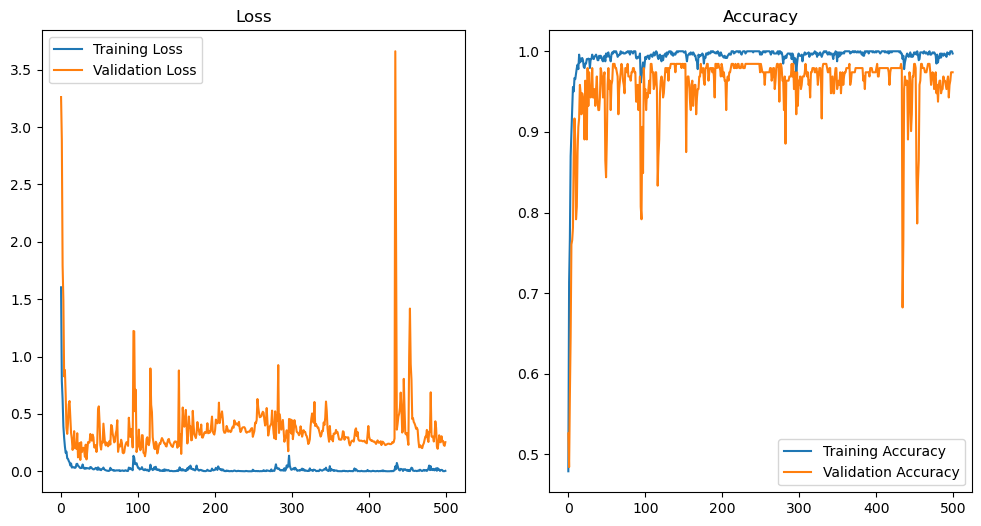

In [8]:
    # Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()


In [9]:
#JAFFEVGG19---1EXP

Found 168 images belonging to 7 classes.
Found 45 images belonging to 7 classes.
Train and Validation sets have been created.


/home/rajesh/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:202: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


CNN model has been created you can proceed to train you data with this model.


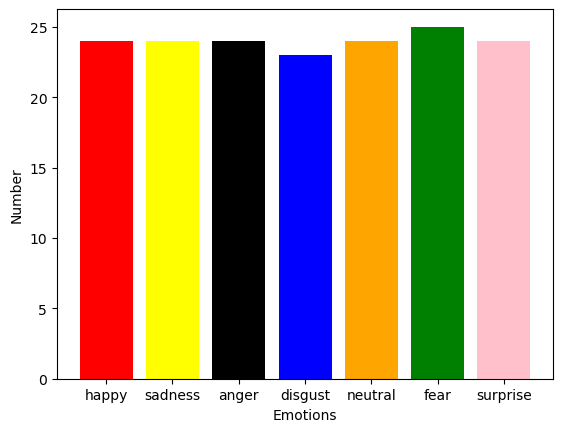

In [10]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "neutral", "fear", "surprise"]

folder_path = "Jaffetrainvalidation/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')


#plt.savefig('hostgoarm.png')
#plt.show()


# Data generators
batch_size = 64

# Data augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)



train_ds = datagen_train.flow_from_directory("Jaffetrainvalidation/train",
                                             target_size=(256, 256),
                                             color_mode="rgb",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

test_ds = datagen_val.flow_from_directory("Jaffetrainvalidation/validation",
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)
print('Train and Validation sets have been created.')


#model vgg19

from keras.applications.vgg19 import VGG19
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

# model.summary()
# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [11]:



# Training the model
epochs = 500

history = model.fit(x=train_ds,
                    epochs=epochs,
                    validation_data=test_ds)

# Print training history
print(history.history)



Epoch 1/500


2024-10-20 11:25:16.969456: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.37GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-20 11:25:16.987241: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-20 11:25:17.087535: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-20 11:25:17.087566: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU

3/3 [==============================] - 15s 4s/step - loss: 2.7427 - accuracy: 0.1964 - val_loss: 3.7222 - val_accuracy: 0.1556
Epoch 2/500
3/3 [==============================] - 2s 481ms/step - loss: 2.1358 - accuracy: 0.3155 - val_loss: 5.7907 - val_accuracy: 0.1556
Epoch 3/500
3/3 [==============================] - 2s 597ms/step - loss: 2.0959 - accuracy: 0.3095 - val_loss: 8.7435 - val_accuracy: 0.1778
Epoch 4/500
3/3 [==============================] - 2s 477ms/step - loss: 2.0035 - accuracy: 0.3333 - val_loss: 11.2813 - val_accuracy: 0.1778
Epoch 5/500
3/3 [==============================] - 2s 601ms/step - loss: 1.8019 - accuracy: 0.4048 - val_loss: 13.7875 - val_accuracy: 0.1556
Epoch 6/500
3/3 [==============================] - 2s 475ms/step - loss: 1.7800 - accuracy: 0.3750 - val_loss: 15.3234 - val_accuracy: 0.1556
Epoch 7/500
3/3 [==============================] - 2s 456ms/step - loss: 1.8338 - accuracy: 0.4286 - val_loss: 15.8394 - val_accuracy: 0.1556
Epoch 8/500
3/3 [======

Epoch 59/500
3/3 [==============================] - 2s 477ms/step - loss: 0.3654 - accuracy: 0.8452 - val_loss: 1.9630 - val_accuracy: 0.5556
Epoch 60/500
3/3 [==============================] - 2s 616ms/step - loss: 0.4242 - accuracy: 0.8393 - val_loss: 1.7914 - val_accuracy: 0.6000
Epoch 61/500
3/3 [==============================] - 2s 606ms/step - loss: 0.2600 - accuracy: 0.9226 - val_loss: 1.5766 - val_accuracy: 0.6000
Epoch 62/500
3/3 [==============================] - 2s 458ms/step - loss: 0.3687 - accuracy: 0.8690 - val_loss: 1.4512 - val_accuracy: 0.6444
Epoch 63/500
3/3 [==============================] - 2s 599ms/step - loss: 0.2906 - accuracy: 0.8869 - val_loss: 1.2326 - val_accuracy: 0.6667
Epoch 64/500
3/3 [==============================] - 2s 597ms/step - loss: 0.4946 - accuracy: 0.8571 - val_loss: 1.0763 - val_accuracy: 0.7111
Epoch 65/500
3/3 [==============================] - 2s 443ms/step - loss: 0.4018 - accuracy: 0.8631 - val_loss: 0.8912 - val_accuracy: 0.7778
Epoch 

3/3 [==============================] - 2s 466ms/step - loss: 0.1427 - accuracy: 0.9524 - val_loss: 1.2920 - val_accuracy: 0.8222
Epoch 117/500
3/3 [==============================] - 2s 608ms/step - loss: 0.2351 - accuracy: 0.9167 - val_loss: 1.2875 - val_accuracy: 0.8222
Epoch 118/500
3/3 [==============================] - 2s 603ms/step - loss: 0.1514 - accuracy: 0.9464 - val_loss: 1.2421 - val_accuracy: 0.8222
Epoch 119/500
3/3 [==============================] - 2s 454ms/step - loss: 0.2172 - accuracy: 0.9286 - val_loss: 1.1417 - val_accuracy: 0.8444
Epoch 120/500
3/3 [==============================] - 2s 476ms/step - loss: 0.2789 - accuracy: 0.9167 - val_loss: 1.0003 - val_accuracy: 0.8222
Epoch 121/500
3/3 [==============================] - 2s 474ms/step - loss: 0.1654 - accuracy: 0.9405 - val_loss: 0.8363 - val_accuracy: 0.8444
Epoch 122/500
3/3 [==============================] - 2s 451ms/step - loss: 0.1566 - accuracy: 0.9226 - val_loss: 0.7899 - val_accuracy: 0.8667
Epoch 123/500

3/3 [==============================] - 2s 475ms/step - loss: 0.1692 - accuracy: 0.9464 - val_loss: 1.6017 - val_accuracy: 0.7556
Epoch 174/500
3/3 [==============================] - 2s 452ms/step - loss: 0.2113 - accuracy: 0.9226 - val_loss: 1.4078 - val_accuracy: 0.7556
Epoch 175/500
3/3 [==============================] - 2s 605ms/step - loss: 0.1450 - accuracy: 0.9464 - val_loss: 1.2693 - val_accuracy: 0.8444
Epoch 176/500
3/3 [==============================] - 2s 481ms/step - loss: 0.1082 - accuracy: 0.9583 - val_loss: 1.1496 - val_accuracy: 0.8667
Epoch 177/500
3/3 [==============================] - 2s 602ms/step - loss: 0.1209 - accuracy: 0.9464 - val_loss: 1.0349 - val_accuracy: 0.8667
Epoch 178/500
3/3 [==============================] - 2s 452ms/step - loss: 0.1730 - accuracy: 0.9405 - val_loss: 1.0171 - val_accuracy: 0.8444
Epoch 179/500
3/3 [==============================] - 2s 605ms/step - loss: 0.1268 - accuracy: 0.9405 - val_loss: 1.0497 - val_accuracy: 0.8222
Epoch 180/500

3/3 [==============================] - 2s 606ms/step - loss: 0.1093 - accuracy: 0.9762 - val_loss: 26.4058 - val_accuracy: 0.1556
Epoch 231/500
3/3 [==============================] - 2s 609ms/step - loss: 0.1216 - accuracy: 0.9702 - val_loss: 8.7592 - val_accuracy: 0.2222
Epoch 232/500
3/3 [==============================] - 2s 456ms/step - loss: 0.1227 - accuracy: 0.9524 - val_loss: 3.5268 - val_accuracy: 0.4667
Epoch 233/500
3/3 [==============================] - 2s 477ms/step - loss: 0.0539 - accuracy: 0.9881 - val_loss: 1.7950 - val_accuracy: 0.6444
Epoch 234/500
3/3 [==============================] - 2s 447ms/step - loss: 0.0763 - accuracy: 0.9643 - val_loss: 1.3676 - val_accuracy: 0.7556
Epoch 235/500
3/3 [==============================] - 2s 478ms/step - loss: 0.0905 - accuracy: 0.9643 - val_loss: 1.3863 - val_accuracy: 0.8000
Epoch 236/500
3/3 [==============================] - 2s 471ms/step - loss: 0.1193 - accuracy: 0.9583 - val_loss: 1.3603 - val_accuracy: 0.7556
Epoch 237/50

3/3 [==============================] - 2s 461ms/step - loss: 0.0667 - accuracy: 0.9762 - val_loss: 0.9742 - val_accuracy: 0.8667
Epoch 288/500
3/3 [==============================] - 2s 473ms/step - loss: 0.1194 - accuracy: 0.9583 - val_loss: 0.9492 - val_accuracy: 0.8667
Epoch 289/500
3/3 [==============================] - 2s 602ms/step - loss: 0.1754 - accuracy: 0.9286 - val_loss: 0.9258 - val_accuracy: 0.8667
Epoch 290/500
3/3 [==============================] - 2s 478ms/step - loss: 0.1685 - accuracy: 0.9405 - val_loss: 0.9612 - val_accuracy: 0.8444
Epoch 291/500
3/3 [==============================] - 2s 479ms/step - loss: 0.1828 - accuracy: 0.9405 - val_loss: 1.0201 - val_accuracy: 0.8444
Epoch 292/500
3/3 [==============================] - 2s 453ms/step - loss: 0.1922 - accuracy: 0.9405 - val_loss: 1.0596 - val_accuracy: 0.8444
Epoch 293/500
3/3 [==============================] - 2s 472ms/step - loss: 0.0755 - accuracy: 0.9702 - val_loss: 1.1210 - val_accuracy: 0.8667
Epoch 294/500

3/3 [==============================] - 2s 599ms/step - loss: 0.1278 - accuracy: 0.9405 - val_loss: 1.2915 - val_accuracy: 0.8222
Epoch 345/500
3/3 [==============================] - 2s 457ms/step - loss: 0.0923 - accuracy: 0.9821 - val_loss: 1.3533 - val_accuracy: 0.8000
Epoch 346/500
3/3 [==============================] - 2s 481ms/step - loss: 0.0586 - accuracy: 0.9643 - val_loss: 1.3995 - val_accuracy: 0.7778
Epoch 347/500
3/3 [==============================] - 2s 620ms/step - loss: 0.0321 - accuracy: 0.9940 - val_loss: 1.4574 - val_accuracy: 0.7778
Epoch 348/500
3/3 [==============================] - 2s 472ms/step - loss: 0.0660 - accuracy: 0.9821 - val_loss: 1.5064 - val_accuracy: 0.7556
Epoch 349/500
3/3 [==============================] - 2s 460ms/step - loss: 0.0651 - accuracy: 0.9762 - val_loss: 1.5346 - val_accuracy: 0.7556
Epoch 350/500
3/3 [==============================] - 2s 457ms/step - loss: 0.1097 - accuracy: 0.9583 - val_loss: 1.5053 - val_accuracy: 0.7556
Epoch 351/500

3/3 [==============================] - 2s 460ms/step - loss: 0.0944 - accuracy: 0.9762 - val_loss: 1.5241 - val_accuracy: 0.8000
Epoch 402/500
3/3 [==============================] - 2s 462ms/step - loss: 0.0207 - accuracy: 0.9940 - val_loss: 1.4666 - val_accuracy: 0.8000
Epoch 403/500
3/3 [==============================] - 2s 471ms/step - loss: 0.1015 - accuracy: 0.9643 - val_loss: 1.4051 - val_accuracy: 0.8444
Epoch 404/500
3/3 [==============================] - 2s 475ms/step - loss: 0.0671 - accuracy: 0.9821 - val_loss: 1.3983 - val_accuracy: 0.8667
Epoch 405/500
3/3 [==============================] - 2s 487ms/step - loss: 0.0884 - accuracy: 0.9643 - val_loss: 1.3712 - val_accuracy: 0.8667
Epoch 406/500
3/3 [==============================] - 2s 606ms/step - loss: 0.0787 - accuracy: 0.9702 - val_loss: 1.3479 - val_accuracy: 0.8667
Epoch 407/500
3/3 [==============================] - 2s 606ms/step - loss: 0.0641 - accuracy: 0.9821 - val_loss: 1.3601 - val_accuracy: 0.8667
Epoch 408/500

3/3 [==============================] - 2s 454ms/step - loss: 0.1353 - accuracy: 0.9583 - val_loss: 1.2137 - val_accuracy: 0.8889
Epoch 459/500
3/3 [==============================] - 2s 453ms/step - loss: 0.1180 - accuracy: 0.9821 - val_loss: 1.1112 - val_accuracy: 0.8889
Epoch 460/500
3/3 [==============================] - 2s 605ms/step - loss: 0.0433 - accuracy: 0.9821 - val_loss: 1.0567 - val_accuracy: 0.8667
Epoch 461/500
3/3 [==============================] - 2s 478ms/step - loss: 0.0802 - accuracy: 0.9702 - val_loss: 0.9832 - val_accuracy: 0.8667
Epoch 462/500
3/3 [==============================] - 2s 598ms/step - loss: 0.0556 - accuracy: 0.9821 - val_loss: 1.0137 - val_accuracy: 0.8444
Epoch 463/500
3/3 [==============================] - 2s 606ms/step - loss: 0.0737 - accuracy: 0.9702 - val_loss: 1.0646 - val_accuracy: 0.8444
Epoch 464/500
3/3 [==============================] - 2s 480ms/step - loss: 0.1082 - accuracy: 0.9464 - val_loss: 1.2441 - val_accuracy: 0.8222
Epoch 465/500

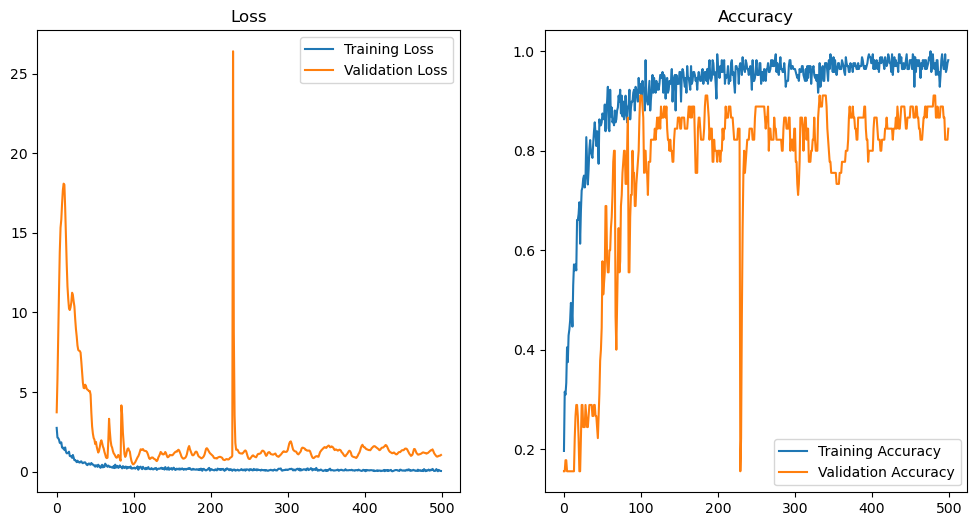

In [12]:
# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [13]:
#JAFFE RESENET----EXP2

Found 168 images belonging to 7 classes.
Found 45 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created you can proceed to train you data with this model.


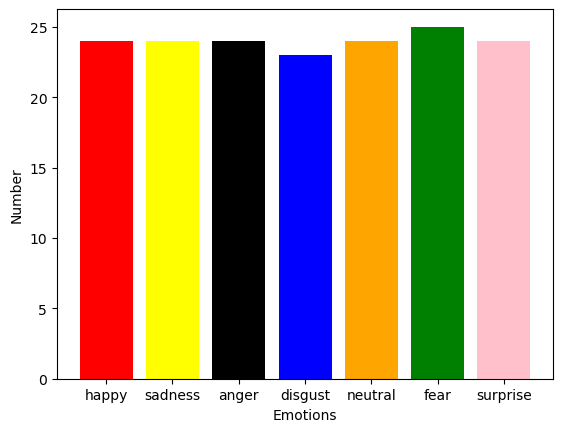

In [14]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "neutral", "fear", "surprise"]

folder_path = "Jaffetrainvalidation/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')


#plt.savefig('hostgoarm.png')
#plt.show()


# Data generators
batch_size = 64

# Data augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)



train_ds = datagen_train.flow_from_directory("Jaffetrainvalidation/train",
                                             target_size=(256, 256),
                                             color_mode="rgb",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

test_ds = datagen_val.flow_from_directory("Jaffetrainvalidation/validation",
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)
print('Train and Validation sets have been created.')


from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)


#conv_base.summary()


model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

# model.summary()
# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')





In [15]:

# Training the model
epochs = 500

history = model.fit(x=train_ds,
                    epochs=epochs,
                    validation_data=test_ds)

# Print training history
print(history.history)


Epoch 1/500
3/3 [==============================] - 12s 2s/step - loss: 3.2938 - accuracy: 0.1369 - val_loss: 8.3385 - val_accuracy: 0.1333
Epoch 2/500
3/3 [==============================] - 2s 652ms/step - loss: 2.6115 - accuracy: 0.2262 - val_loss: 15.7237 - val_accuracy: 0.1556
Epoch 3/500
3/3 [==============================] - 2s 490ms/step - loss: 2.4770 - accuracy: 0.2262 - val_loss: 28.3411 - val_accuracy: 0.1556
Epoch 4/500
3/3 [==============================] - 2s 652ms/step - loss: 2.5599 - accuracy: 0.2024 - val_loss: 31.3642 - val_accuracy: 0.1556
Epoch 5/500
3/3 [==============================] - 2s 490ms/step - loss: 2.4728 - accuracy: 0.2083 - val_loss: 30.9470 - val_accuracy: 0.1556
Epoch 6/500
3/3 [==============================] - 2s 490ms/step - loss: 2.1389 - accuracy: 0.2143 - val_loss: 25.4835 - val_accuracy: 0.1556
Epoch 7/500
3/3 [==============================] - 2s 647ms/step - loss: 2.3464 - accuracy: 0.2440 - val_loss: 21.7794 - val_accuracy: 0.1556
Epoch 8/5

3/3 [==============================] - 2s 650ms/step - loss: 1.1914 - accuracy: 0.5774 - val_loss: 6.4720 - val_accuracy: 0.1778
Epoch 59/500
3/3 [==============================] - 2s 491ms/step - loss: 1.2271 - accuracy: 0.4762 - val_loss: 6.7832 - val_accuracy: 0.1556
Epoch 60/500
3/3 [==============================] - 2s 508ms/step - loss: 1.1571 - accuracy: 0.5417 - val_loss: 6.7612 - val_accuracy: 0.1556
Epoch 61/500
3/3 [==============================] - 2s 490ms/step - loss: 1.2097 - accuracy: 0.5417 - val_loss: 6.2547 - val_accuracy: 0.1778
Epoch 62/500
3/3 [==============================] - 2s 489ms/step - loss: 1.1694 - accuracy: 0.5536 - val_loss: 5.0962 - val_accuracy: 0.2222
Epoch 63/500
3/3 [==============================] - 2s 652ms/step - loss: 1.3892 - accuracy: 0.5179 - val_loss: 4.8096 - val_accuracy: 0.2889
Epoch 64/500
3/3 [==============================] - 2s 498ms/step - loss: 1.3586 - accuracy: 0.4881 - val_loss: 5.5803 - val_accuracy: 0.2444
Epoch 65/500
3/3 [=

3/3 [==============================] - 2s 490ms/step - loss: 0.9752 - accuracy: 0.6369 - val_loss: 2.1140 - val_accuracy: 0.4889
Epoch 116/500
3/3 [==============================] - 2s 487ms/step - loss: 0.8739 - accuracy: 0.6845 - val_loss: 2.2739 - val_accuracy: 0.3778
Epoch 117/500
3/3 [==============================] - 2s 491ms/step - loss: 0.9561 - accuracy: 0.6548 - val_loss: 2.6412 - val_accuracy: 0.2667
Epoch 118/500
3/3 [==============================] - 2s 507ms/step - loss: 0.9978 - accuracy: 0.6548 - val_loss: 2.9179 - val_accuracy: 0.2667
Epoch 119/500
3/3 [==============================] - 2s 491ms/step - loss: 0.8799 - accuracy: 0.6607 - val_loss: 2.4297 - val_accuracy: 0.3111
Epoch 120/500
3/3 [==============================] - 2s 487ms/step - loss: 0.9457 - accuracy: 0.6726 - val_loss: 2.3255 - val_accuracy: 0.4000
Epoch 121/500
3/3 [==============================] - 2s 505ms/step - loss: 0.8625 - accuracy: 0.6786 - val_loss: 2.9987 - val_accuracy: 0.2222
Epoch 122/500

3/3 [==============================] - 2s 492ms/step - loss: 0.7793 - accuracy: 0.7143 - val_loss: 4.4238 - val_accuracy: 0.3333
Epoch 173/500
3/3 [==============================] - 2s 511ms/step - loss: 0.8101 - accuracy: 0.7381 - val_loss: 3.6815 - val_accuracy: 0.3333
Epoch 174/500
3/3 [==============================] - 2s 658ms/step - loss: 0.7731 - accuracy: 0.7262 - val_loss: 3.0654 - val_accuracy: 0.4000
Epoch 175/500
3/3 [==============================] - 2s 504ms/step - loss: 0.8156 - accuracy: 0.6845 - val_loss: 2.3745 - val_accuracy: 0.4889
Epoch 176/500
3/3 [==============================] - 2s 494ms/step - loss: 0.7215 - accuracy: 0.7381 - val_loss: 2.7751 - val_accuracy: 0.3778
Epoch 177/500
3/3 [==============================] - 2s 486ms/step - loss: 0.6958 - accuracy: 0.7381 - val_loss: 2.9747 - val_accuracy: 0.3556
Epoch 178/500
3/3 [==============================] - 2s 651ms/step - loss: 0.6668 - accuracy: 0.7738 - val_loss: 2.9581 - val_accuracy: 0.3556
Epoch 179/500

3/3 [==============================] - 2s 489ms/step - loss: 0.6088 - accuracy: 0.7798 - val_loss: 2.3189 - val_accuracy: 0.5778
Epoch 230/500
3/3 [==============================] - 2s 506ms/step - loss: 0.7090 - accuracy: 0.7500 - val_loss: 2.2589 - val_accuracy: 0.6000
Epoch 231/500
3/3 [==============================] - 2s 507ms/step - loss: 0.6525 - accuracy: 0.7500 - val_loss: 2.2205 - val_accuracy: 0.6000
Epoch 232/500
3/3 [==============================] - 2s 512ms/step - loss: 0.6752 - accuracy: 0.7798 - val_loss: 2.4391 - val_accuracy: 0.5111
Epoch 233/500
3/3 [==============================] - 2s 645ms/step - loss: 0.7243 - accuracy: 0.7500 - val_loss: 2.5428 - val_accuracy: 0.4667
Epoch 234/500
3/3 [==============================] - 2s 508ms/step - loss: 0.6193 - accuracy: 0.7560 - val_loss: 2.5449 - val_accuracy: 0.4444
Epoch 235/500
3/3 [==============================] - 2s 508ms/step - loss: 0.5854 - accuracy: 0.7738 - val_loss: 3.2654 - val_accuracy: 0.4000
Epoch 236/500

3/3 [==============================] - 2s 508ms/step - loss: 0.5576 - accuracy: 0.7798 - val_loss: 2.6021 - val_accuracy: 0.4222
Epoch 287/500
3/3 [==============================] - 2s 506ms/step - loss: 0.5817 - accuracy: 0.7857 - val_loss: 2.4085 - val_accuracy: 0.4889
Epoch 288/500
3/3 [==============================] - 2s 661ms/step - loss: 0.5997 - accuracy: 0.7679 - val_loss: 2.0360 - val_accuracy: 0.5778
Epoch 289/500
3/3 [==============================] - 2s 657ms/step - loss: 0.5922 - accuracy: 0.7857 - val_loss: 1.5128 - val_accuracy: 0.6000
Epoch 290/500
3/3 [==============================] - 2s 489ms/step - loss: 0.6165 - accuracy: 0.7798 - val_loss: 1.7745 - val_accuracy: 0.4444
Epoch 291/500
3/3 [==============================] - 2s 489ms/step - loss: 0.5113 - accuracy: 0.8214 - val_loss: 2.2488 - val_accuracy: 0.4222
Epoch 292/500
3/3 [==============================] - 2s 494ms/step - loss: 0.5029 - accuracy: 0.8512 - val_loss: 2.7264 - val_accuracy: 0.4000
Epoch 293/500

3/3 [==============================] - 2s 509ms/step - loss: 0.5712 - accuracy: 0.8452 - val_loss: 4.4033 - val_accuracy: 0.2889
Epoch 344/500
3/3 [==============================] - 2s 497ms/step - loss: 0.5527 - accuracy: 0.8036 - val_loss: 4.6063 - val_accuracy: 0.2444
Epoch 345/500
3/3 [==============================] - 2s 659ms/step - loss: 0.6339 - accuracy: 0.8095 - val_loss: 5.4894 - val_accuracy: 0.2222
Epoch 346/500
3/3 [==============================] - 2s 659ms/step - loss: 0.5491 - accuracy: 0.7917 - val_loss: 4.3855 - val_accuracy: 0.2444
Epoch 347/500
3/3 [==============================] - 2s 651ms/step - loss: 0.4419 - accuracy: 0.8393 - val_loss: 3.1180 - val_accuracy: 0.3778
Epoch 348/500
3/3 [==============================] - 2s 653ms/step - loss: 0.4876 - accuracy: 0.8393 - val_loss: 2.9916 - val_accuracy: 0.3778
Epoch 349/500
3/3 [==============================] - 2s 650ms/step - loss: 0.5241 - accuracy: 0.8036 - val_loss: 3.3598 - val_accuracy: 0.3111
Epoch 350/500

3/3 [==============================] - 2s 655ms/step - loss: 0.4366 - accuracy: 0.8274 - val_loss: 2.4554 - val_accuracy: 0.4667
Epoch 401/500
3/3 [==============================] - 2s 492ms/step - loss: 0.4594 - accuracy: 0.8095 - val_loss: 3.2889 - val_accuracy: 0.4444
Epoch 402/500
3/3 [==============================] - 2s 491ms/step - loss: 0.4669 - accuracy: 0.8095 - val_loss: 3.8485 - val_accuracy: 0.4000
Epoch 403/500
3/3 [==============================] - 2s 498ms/step - loss: 0.4176 - accuracy: 0.8452 - val_loss: 3.2778 - val_accuracy: 0.4222
Epoch 404/500
3/3 [==============================] - 2s 494ms/step - loss: 0.4837 - accuracy: 0.8333 - val_loss: 1.6569 - val_accuracy: 0.6667
Epoch 405/500
3/3 [==============================] - 2s 496ms/step - loss: 0.4891 - accuracy: 0.8274 - val_loss: 1.1147 - val_accuracy: 0.7111
Epoch 406/500
3/3 [==============================] - 2s 506ms/step - loss: 0.4443 - accuracy: 0.8393 - val_loss: 1.7143 - val_accuracy: 0.5556
Epoch 407/500

3/3 [==============================] - 2s 657ms/step - loss: 0.3720 - accuracy: 0.8869 - val_loss: 2.8448 - val_accuracy: 0.4667
Epoch 458/500
3/3 [==============================] - 2s 493ms/step - loss: 0.4680 - accuracy: 0.8214 - val_loss: 2.1490 - val_accuracy: 0.4667
Epoch 459/500
3/3 [==============================] - 2s 659ms/step - loss: 0.5305 - accuracy: 0.7976 - val_loss: 2.3223 - val_accuracy: 0.5333
Epoch 460/500
3/3 [==============================] - 2s 491ms/step - loss: 0.5274 - accuracy: 0.7857 - val_loss: 2.3460 - val_accuracy: 0.5111
Epoch 461/500
3/3 [==============================] - 2s 496ms/step - loss: 0.3950 - accuracy: 0.8571 - val_loss: 1.6917 - val_accuracy: 0.6000
Epoch 462/500
3/3 [==============================] - 2s 492ms/step - loss: 0.5355 - accuracy: 0.8155 - val_loss: 1.1506 - val_accuracy: 0.7333
Epoch 463/500
3/3 [==============================] - 2s 487ms/step - loss: 0.4265 - accuracy: 0.8333 - val_loss: 0.9947 - val_accuracy: 0.7778
Epoch 464/500

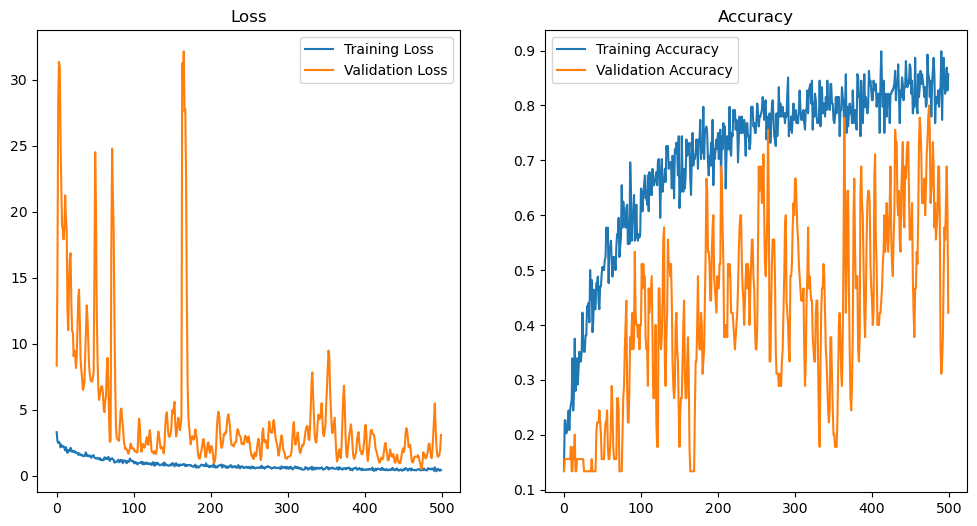

In [16]:

# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [17]:
#FER2013VGG19---EXP1

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128

# Data Generators with augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)

# Create training and validation data sets
train_set = datagen_train.flow_from_directory(
    folder_path,
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Corrected test set creation
test_set = datagen_val.flow_from_directory(
    "images/test",  # Added a comma at the end of this line
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print('Train and Validation sets have been created.')

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created, you can proceed to train your data with this model.


In [19]:
# Training the model
epochs = 500

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set
)

# Print training history
print(history.history)



Epoch 1/500
225/225 [==============================] - 19s 76ms/step - loss: 2.3876 - accuracy: 0.2088 - val_loss: 1.8011 - val_accuracy: 0.3100
Epoch 2/500
225/225 [==============================] - 15s 67ms/step - loss: 2.1552 - accuracy: 0.2453 - val_loss: 1.7579 - val_accuracy: 0.3324
Epoch 3/500
225/225 [==============================] - 15s 66ms/step - loss: 2.0516 - accuracy: 0.2628 - val_loss: 1.7200 - val_accuracy: 0.3403
Epoch 4/500
225/225 [==============================] - 15s 66ms/step - loss: 1.9788 - accuracy: 0.2710 - val_loss: 1.7011 - val_accuracy: 0.3438
Epoch 5/500
225/225 [==============================] - 15s 66ms/step - loss: 1.9330 - accuracy: 0.2773 - val_loss: 1.6891 - val_accuracy: 0.3487
Epoch 6/500
225/225 [==============================] - 15s 66ms/step - loss: 1.8970 - accuracy: 0.2849 - val_loss: 1.6597 - val_accuracy: 0.3504
Epoch 7/500
225/225 [==============================] - 15s 68ms/step - loss: 1.8726 - accuracy: 0.2878 - val_loss: 1.6615 - val_ac

225/225 [==============================] - 15s 66ms/step - loss: 1.5736 - accuracy: 0.3813 - val_loss: 1.5331 - val_accuracy: 0.3945
Epoch 58/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5741 - accuracy: 0.3813 - val_loss: 1.5337 - val_accuracy: 0.3983
Epoch 59/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5702 - accuracy: 0.3809 - val_loss: 1.5272 - val_accuracy: 0.4055
Epoch 60/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5729 - accuracy: 0.3804 - val_loss: 1.5260 - val_accuracy: 0.4061
Epoch 61/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5694 - accuracy: 0.3810 - val_loss: 1.5266 - val_accuracy: 0.4029
Epoch 62/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5660 - accuracy: 0.3832 - val_loss: 1.5296 - val_accuracy: 0.3984
Epoch 63/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5682 - accuracy: 0.3859 - val_loss: 1.5258 - val_accuracy

225/225 [==============================] - 15s 67ms/step - loss: 1.5242 - accuracy: 0.4028 - val_loss: 1.5083 - val_accuracy: 0.4122
Epoch 114/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5221 - accuracy: 0.3996 - val_loss: 1.5131 - val_accuracy: 0.4106
Epoch 115/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5274 - accuracy: 0.4028 - val_loss: 1.5096 - val_accuracy: 0.4154
Epoch 116/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5258 - accuracy: 0.4065 - val_loss: 1.5019 - val_accuracy: 0.4147
Epoch 117/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5234 - accuracy: 0.4021 - val_loss: 1.5045 - val_accuracy: 0.4209
Epoch 118/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5192 - accuracy: 0.4077 - val_loss: 1.5020 - val_accuracy: 0.4196
Epoch 119/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5190 - accuracy: 0.4071 - val_loss: 1.5078 - val_ac

Epoch 169/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4917 - accuracy: 0.4214 - val_loss: 1.4935 - val_accuracy: 0.4276
Epoch 170/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4909 - accuracy: 0.4207 - val_loss: 1.4987 - val_accuracy: 0.4248
Epoch 171/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5005 - accuracy: 0.4149 - val_loss: 1.4942 - val_accuracy: 0.4255
Epoch 172/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4931 - accuracy: 0.4189 - val_loss: 1.4947 - val_accuracy: 0.4263
Epoch 173/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4882 - accuracy: 0.4163 - val_loss: 1.4986 - val_accuracy: 0.4245
Epoch 174/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4905 - accuracy: 0.4212 - val_loss: 1.4927 - val_accuracy: 0.4260
Epoch 175/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4977 - accuracy: 0.4169 - val_loss: 1

Epoch 225/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4683 - accuracy: 0.4294 - val_loss: 1.4885 - val_accuracy: 0.4285
Epoch 226/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4742 - accuracy: 0.4304 - val_loss: 1.4899 - val_accuracy: 0.4263
Epoch 227/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4758 - accuracy: 0.4249 - val_loss: 1.4897 - val_accuracy: 0.4237
Epoch 228/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4709 - accuracy: 0.4302 - val_loss: 1.4967 - val_accuracy: 0.4262
Epoch 229/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4743 - accuracy: 0.4282 - val_loss: 1.4884 - val_accuracy: 0.4316
Epoch 230/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4718 - accuracy: 0.4270 - val_loss: 1.4971 - val_accuracy: 0.4250
Epoch 231/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4673 - accuracy: 0.4321 - val_loss: 1

Epoch 281/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4529 - accuracy: 0.4371 - val_loss: 1.4843 - val_accuracy: 0.4365
Epoch 282/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4525 - accuracy: 0.4345 - val_loss: 1.4939 - val_accuracy: 0.4284
Epoch 283/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4567 - accuracy: 0.4350 - val_loss: 1.4867 - val_accuracy: 0.4340
Epoch 284/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4564 - accuracy: 0.4320 - val_loss: 1.4857 - val_accuracy: 0.4323
Epoch 285/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4489 - accuracy: 0.4375 - val_loss: 1.4865 - val_accuracy: 0.4330
Epoch 286/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4596 - accuracy: 0.4363 - val_loss: 1.4936 - val_accuracy: 0.4278
Epoch 287/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4564 - accuracy: 0.4301 - val_loss: 1

Epoch 337/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4453 - accuracy: 0.4392 - val_loss: 1.4855 - val_accuracy: 0.4351
Epoch 338/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4528 - accuracy: 0.4374 - val_loss: 1.4901 - val_accuracy: 0.4373
Epoch 339/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4489 - accuracy: 0.4389 - val_loss: 1.4838 - val_accuracy: 0.4361
Epoch 340/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4505 - accuracy: 0.4387 - val_loss: 1.4942 - val_accuracy: 0.4326
Epoch 341/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4467 - accuracy: 0.4383 - val_loss: 1.4886 - val_accuracy: 0.4363
Epoch 342/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4443 - accuracy: 0.4365 - val_loss: 1.4818 - val_accuracy: 0.4363
Epoch 343/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4453 - accuracy: 0.4398 - val_loss: 1

Epoch 393/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4393 - accuracy: 0.4404 - val_loss: 1.4869 - val_accuracy: 0.4356
Epoch 394/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4316 - accuracy: 0.4439 - val_loss: 1.4832 - val_accuracy: 0.4401
Epoch 395/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4339 - accuracy: 0.4459 - val_loss: 1.4930 - val_accuracy: 0.4337
Epoch 396/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4296 - accuracy: 0.4438 - val_loss: 1.4805 - val_accuracy: 0.4390
Epoch 397/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4350 - accuracy: 0.4415 - val_loss: 1.4930 - val_accuracy: 0.4340
Epoch 398/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4351 - accuracy: 0.4418 - val_loss: 1.4807 - val_accuracy: 0.4393
Epoch 399/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4310 - accuracy: 0.4452 - val_loss: 1

Epoch 449/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4326 - accuracy: 0.4456 - val_loss: 1.4781 - val_accuracy: 0.4437
Epoch 450/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4234 - accuracy: 0.4472 - val_loss: 1.4811 - val_accuracy: 0.4418
Epoch 451/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4232 - accuracy: 0.4511 - val_loss: 1.4979 - val_accuracy: 0.4407
Epoch 452/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4216 - accuracy: 0.4508 - val_loss: 1.4845 - val_accuracy: 0.4368
Epoch 453/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4260 - accuracy: 0.4478 - val_loss: 1.4775 - val_accuracy: 0.4400
Epoch 454/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4291 - accuracy: 0.4500 - val_loss: 1.4777 - val_accuracy: 0.4390
Epoch 455/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4212 - accuracy: 0.4509 - val_loss: 1

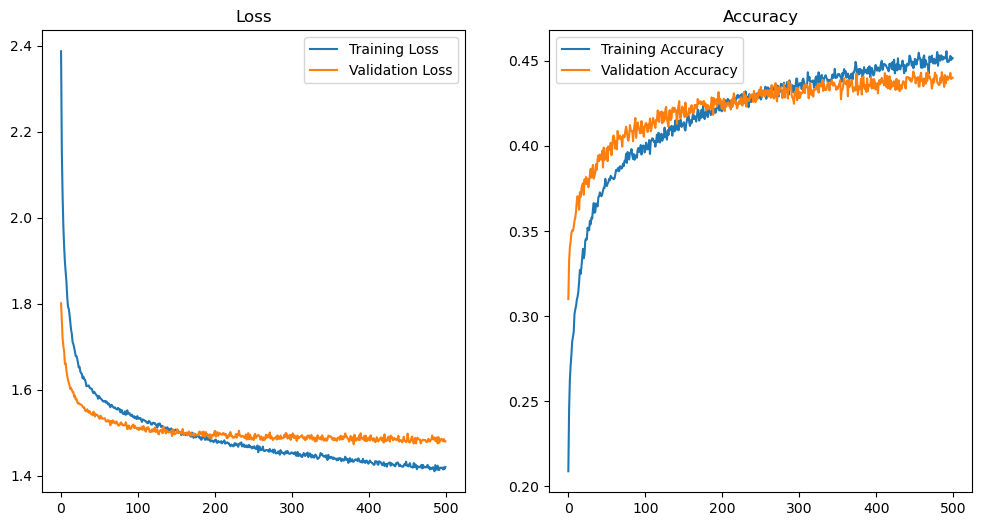

In [20]:
# Plotting training history
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [21]:
#ferresnet---EXP1

In [22]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128

# Data Generators with augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)

# Create training and validation data sets
train_set = datagen_train.flow_from_directory(
    folder_path,
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Corrected test set creation
test_set = datagen_val.flow_from_directory(
    "images/test",  # Added a comma at the end of this line
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print('Train and Validation sets have been created.')



from keras.applications.resnet import ResNet152
base_model = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created, you can proceed to train your data with this model.


In [23]:

# Training the model
epochs = 500

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set
)

# Print training history
print(history.history)



Epoch 1/500
225/225 [==============================] - 23s 78ms/step - loss: 2.4299 - accuracy: 0.1759 - val_loss: 1.8349 - val_accuracy: 0.2324
Epoch 2/500
225/225 [==============================] - 16s 71ms/step - loss: 2.2322 - accuracy: 0.2023 - val_loss: 1.9465 - val_accuracy: 0.2428
Epoch 3/500
225/225 [==============================] - 16s 70ms/step - loss: 2.1221 - accuracy: 0.2243 - val_loss: 1.8435 - val_accuracy: 0.2877
Epoch 4/500
225/225 [==============================] - 16s 70ms/step - loss: 2.0799 - accuracy: 0.2310 - val_loss: 1.8976 - val_accuracy: 0.2860
Epoch 5/500
225/225 [==============================] - 16s 70ms/step - loss: 2.0272 - accuracy: 0.2394 - val_loss: 1.8187 - val_accuracy: 0.2816
Epoch 6/500
225/225 [==============================] - 16s 70ms/step - loss: 2.0001 - accuracy: 0.2457 - val_loss: 1.7550 - val_accuracy: 0.2860
Epoch 7/500
225/225 [==============================] - 16s 70ms/step - loss: 1.9787 - accuracy: 0.2457 - val_loss: 1.7366 - val_ac

225/225 [==============================] - 16s 69ms/step - loss: 1.6826 - accuracy: 0.3319 - val_loss: 1.9485 - val_accuracy: 0.3082
Epoch 58/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6818 - accuracy: 0.3342 - val_loss: 1.8893 - val_accuracy: 0.2976
Epoch 59/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6752 - accuracy: 0.3324 - val_loss: 1.7284 - val_accuracy: 0.3243
Epoch 60/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6794 - accuracy: 0.3348 - val_loss: 1.8028 - val_accuracy: 0.2941
Epoch 61/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6720 - accuracy: 0.3386 - val_loss: 1.6077 - val_accuracy: 0.3695
Epoch 62/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6754 - accuracy: 0.3334 - val_loss: 1.7061 - val_accuracy: 0.3151
Epoch 63/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6695 - accuracy: 0.3376 - val_loss: 1.6169 - val_accuracy

225/225 [==============================] - 16s 70ms/step - loss: 1.6429 - accuracy: 0.3534 - val_loss: 1.6190 - val_accuracy: 0.3631
Epoch 114/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6413 - accuracy: 0.3508 - val_loss: 1.6308 - val_accuracy: 0.3569
Epoch 115/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6440 - accuracy: 0.3507 - val_loss: 1.6714 - val_accuracy: 0.3438
Epoch 116/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6486 - accuracy: 0.3517 - val_loss: 1.6374 - val_accuracy: 0.3515
Epoch 117/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6445 - accuracy: 0.3492 - val_loss: 1.9392 - val_accuracy: 0.2285
Epoch 118/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6450 - accuracy: 0.3527 - val_loss: 1.7373 - val_accuracy: 0.3175
Epoch 119/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6457 - accuracy: 0.3492 - val_loss: 1.6543 - val_ac

Epoch 169/500
225/225 [==============================] - 16s 73ms/step - loss: 1.6239 - accuracy: 0.3586 - val_loss: 2.1788 - val_accuracy: 0.1970
Epoch 170/500
225/225 [==============================] - 16s 72ms/step - loss: 1.6328 - accuracy: 0.3565 - val_loss: 1.6566 - val_accuracy: 0.3344
Epoch 171/500
225/225 [==============================] - 16s 73ms/step - loss: 1.6279 - accuracy: 0.3603 - val_loss: 1.6113 - val_accuracy: 0.3640
Epoch 172/500
225/225 [==============================] - 17s 73ms/step - loss: 1.6284 - accuracy: 0.3600 - val_loss: 1.7306 - val_accuracy: 0.3232
Epoch 173/500
225/225 [==============================] - 19s 83ms/step - loss: 1.6242 - accuracy: 0.3589 - val_loss: 1.6212 - val_accuracy: 0.3576
Epoch 174/500
225/225 [==============================] - 24s 108ms/step - loss: 1.6242 - accuracy: 0.3610 - val_loss: 1.6119 - val_accuracy: 0.3735
Epoch 175/500
225/225 [==============================] - 34s 153ms/step - loss: 1.6279 - accuracy: 0.3572 - val_loss:

225/225 [==============================] - 16s 70ms/step - loss: 1.6150 - accuracy: 0.3664 - val_loss: 1.6303 - val_accuracy: 0.3427
Epoch 225/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6127 - accuracy: 0.3634 - val_loss: 2.0260 - val_accuracy: 0.2726
Epoch 226/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6170 - accuracy: 0.3624 - val_loss: 1.7046 - val_accuracy: 0.3391
Epoch 227/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6150 - accuracy: 0.3640 - val_loss: 1.8697 - val_accuracy: 0.2761
Epoch 228/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6167 - accuracy: 0.3633 - val_loss: 1.8275 - val_accuracy: 0.2959
Epoch 229/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6107 - accuracy: 0.3680 - val_loss: 1.8243 - val_accuracy: 0.3292
Epoch 230/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6184 - accuracy: 0.3619 - val_loss: 1.8208 - val_ac

Epoch 280/500
225/225 [==============================] - 16s 71ms/step - loss: 1.6062 - accuracy: 0.3707 - val_loss: 1.7233 - val_accuracy: 0.3547
Epoch 281/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6097 - accuracy: 0.3692 - val_loss: 1.7402 - val_accuracy: 0.3084
Epoch 282/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6054 - accuracy: 0.3681 - val_loss: 1.5573 - val_accuracy: 0.3795
Epoch 283/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6084 - accuracy: 0.3692 - val_loss: 1.7169 - val_accuracy: 0.3292
Epoch 284/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6118 - accuracy: 0.3630 - val_loss: 1.5671 - val_accuracy: 0.3911
Epoch 285/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6065 - accuracy: 0.3677 - val_loss: 1.5459 - val_accuracy: 0.3890
Epoch 286/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6040 - accuracy: 0.3673 - val_loss: 1

Epoch 336/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6008 - accuracy: 0.3735 - val_loss: 1.5956 - val_accuracy: 0.3761
Epoch 337/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5976 - accuracy: 0.3718 - val_loss: 1.7371 - val_accuracy: 0.2991
Epoch 338/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5988 - accuracy: 0.3736 - val_loss: 1.9246 - val_accuracy: 0.2587
Epoch 339/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6047 - accuracy: 0.3704 - val_loss: 1.5689 - val_accuracy: 0.3849
Epoch 340/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6044 - accuracy: 0.3676 - val_loss: 1.6204 - val_accuracy: 0.3600
Epoch 341/500
225/225 [==============================] - 16s 69ms/step - loss: 1.5999 - accuracy: 0.3718 - val_loss: 1.7500 - val_accuracy: 0.2976
Epoch 342/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6028 - accuracy: 0.3676 - val_loss: 1

Epoch 392/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5980 - accuracy: 0.3711 - val_loss: 1.6176 - val_accuracy: 0.3755
Epoch 393/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5971 - accuracy: 0.3719 - val_loss: 1.9053 - val_accuracy: 0.2618
Epoch 394/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5977 - accuracy: 0.3720 - val_loss: 1.5814 - val_accuracy: 0.3682
Epoch 395/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5966 - accuracy: 0.3708 - val_loss: 1.5478 - val_accuracy: 0.3859
Epoch 396/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5930 - accuracy: 0.3741 - val_loss: 1.6213 - val_accuracy: 0.3735
Epoch 397/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5953 - accuracy: 0.3755 - val_loss: 1.6366 - val_accuracy: 0.3596
Epoch 398/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5960 - accuracy: 0.3744 - val_loss: 1

Epoch 448/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5900 - accuracy: 0.3759 - val_loss: 1.6306 - val_accuracy: 0.3536
Epoch 449/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5958 - accuracy: 0.3757 - val_loss: 1.5387 - val_accuracy: 0.4011
Epoch 450/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5918 - accuracy: 0.3779 - val_loss: 1.6073 - val_accuracy: 0.3787
Epoch 451/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5922 - accuracy: 0.3742 - val_loss: 1.6725 - val_accuracy: 0.3519
Epoch 452/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5933 - accuracy: 0.3755 - val_loss: 1.6941 - val_accuracy: 0.3434
Epoch 453/500
225/225 [==============================] - 17s 76ms/step - loss: 1.5895 - accuracy: 0.3779 - val_loss: 1.5945 - val_accuracy: 0.3658
Epoch 454/500
225/225 [==============================] - 17s 75ms/step - loss: 1.5934 - accuracy: 0.3737 - val_loss: 1

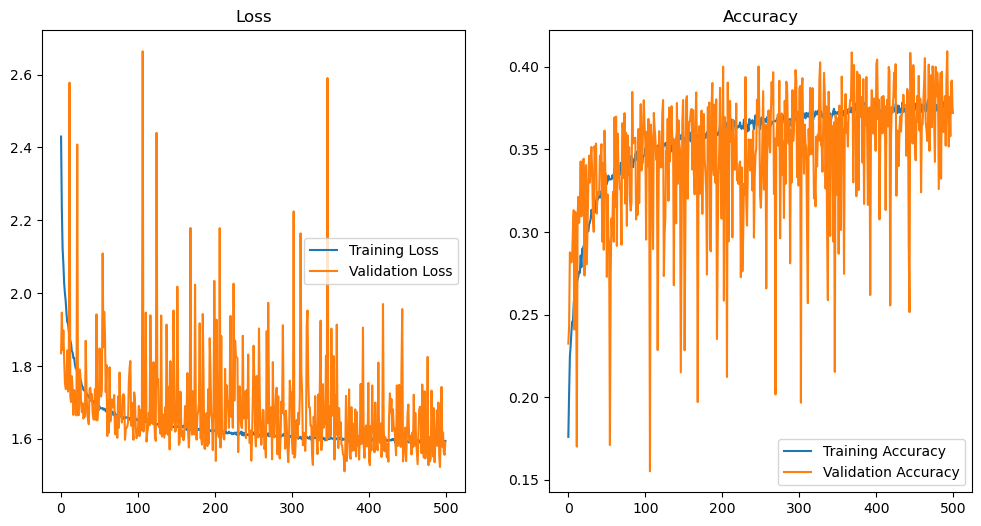

In [24]:
# Plotting training history
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()